# Лабораторная работа 3. Морфологические преобразования

Морфологические преобразования

Следует реализовать выделение проблемных зубьев у шестеренки. Пример разобран на лекции.

Описание есть у Стокмана.

Использовать только морфологические операции для бинарных изображений.

Можно использовать для этого функции OpenCV, например:

**Erode** -- размывание(операция сужения)

**Dilate** -- растягивание(операция расширения)

In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Читаем изображение

In [2]:
imageSrs = cv2.imread("19.png")

In [3]:
def showImage(imageArray, size=(10,10)):
    plt.figure(figsize=size)
    plt.imshow(imageArray, interpolation='nearest')
    plt.show()

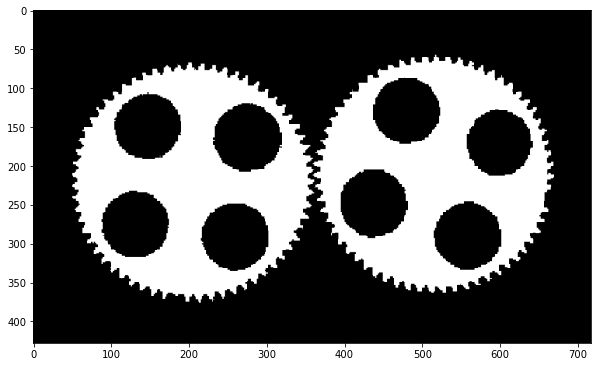

In [4]:
showImage(imageSrs)

### 1. hole_ring

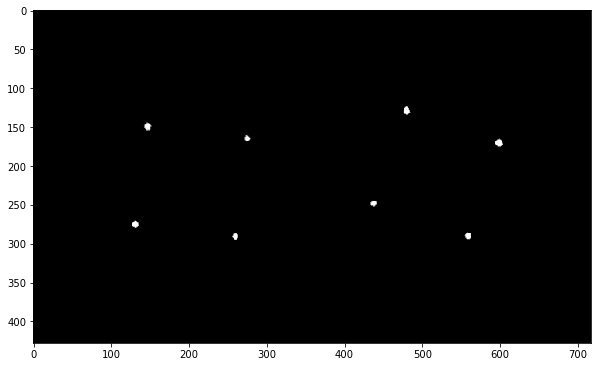

In [5]:
res = imageSrs
circle = cv2.circle(np.zeros((100, 100), 'uint8'), (50,50), 48, 255, -1)
mask = cv2.circle(np.zeros((100, 100), 'uint8'), (50,50), 50, 255, -1) - circle
res_points = cv2.erode(res, mask)
showImage(res_points)

### 2. hole_mask

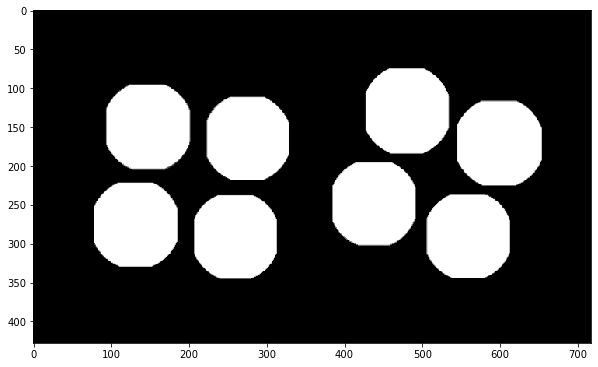

In [6]:
res = res_points
circlePoint = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 54, 255, -1)
#maskPoint = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 53, 255, -1) - circlePoint
imagePoint = cv2.dilate(res, circlePoint)
showImage(imagePoint)

### 3. gear_body

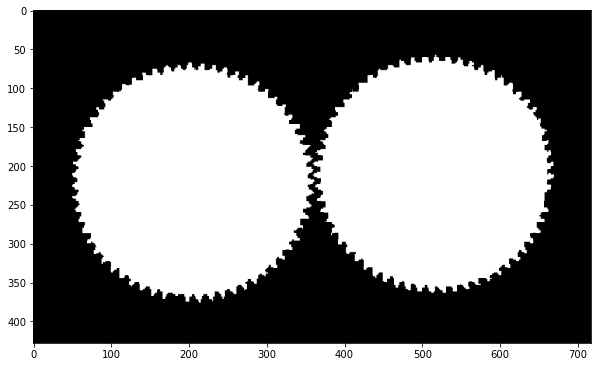

In [7]:
merginPointAndSource = imageSrs | imagePoint
showImage(merginPointAndSource)

### 4. sampling_ring_spacer

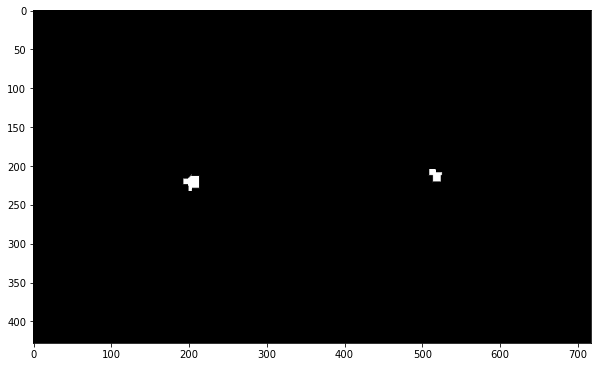

In [8]:
centerCircles = cv2.erode(merginPointAndSource, np.ones((200, 200), np.uint8))
showImage(centerCircles)

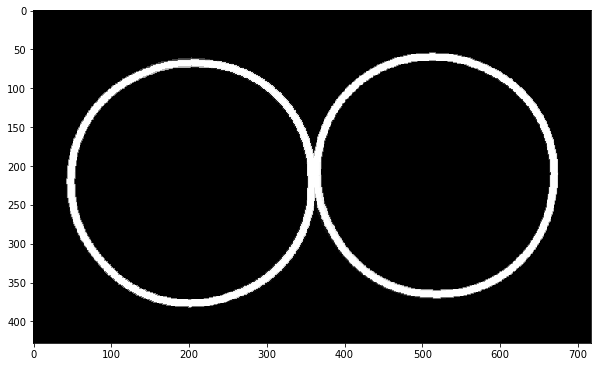

In [9]:
imageBigCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), 150, 255, -1))
imageSmallCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), 140, 255, -1))
imageCircles = imageBigCircle - imageSmallCircle
showImage(imageCircles)


### 5. sampling_ring_width

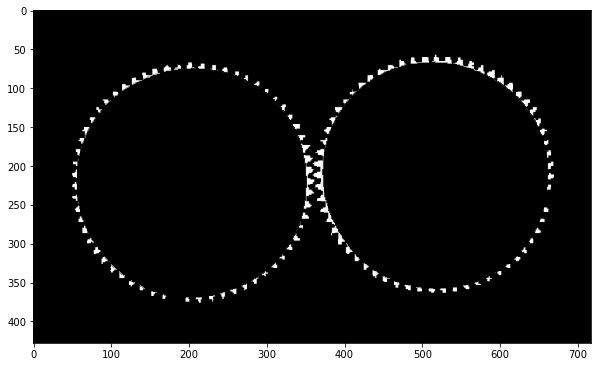

In [10]:
imageBigCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), 150, 255, -1))
imageSmallCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), 138, 255, -1))
imageCircles = imageBigCircle - imageSmallCircle
teethCircles = imageSrs & imageCircles
showImage(teethCircles)

def transformCircle(image, r1, r2):
    res = image
    imageBigCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), r1, 255, -1))
    imageSmallCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), r2, 255, -1))
    imageCircles = imageBigCircle - imageSmallCircle
    teethCircles = imageSrs & imageCircles
    showImage(teethCircles)
maxValue = 500

### 6. tip_spacing

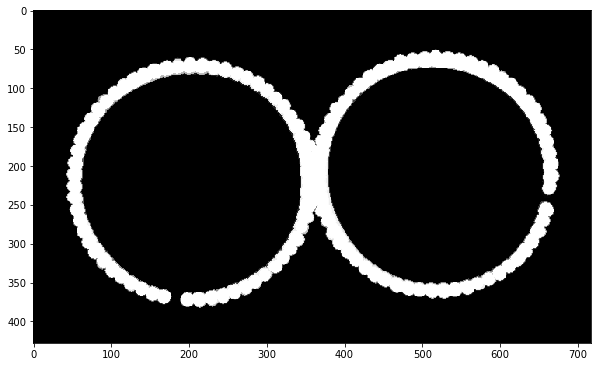

In [11]:
res = teethCircles
circle = cv2.circle(np.zeros((80, 80), np.uint8), (40, 40), 7, 255, -1)
ringsWithGap = cv2.dilate(res, circle)
showImage(ringsWithGap)

def transformCircle(image, widthR, r):
    res = image
    circle = cv2.circle(np.zeros((widthR, widthR), np.uint8), (widthR // 2, widthR // 2), r, 255, -1)
    res = cv2.dilate(res, circle)
    showImage(res)
maxValue = 500

### 7. defect_cue

In [13]:
def getNormalizationImage(image):
    width = image.shape[1]
    height = image.shape[0]
    whiteColor = [255, 255, 255]
    blackColor = [0, 0, 0]
    newImage = image.copy()
    for i in range(height):
        for j in range(width):
            newImage[i, j] = blackColor if image[i, j][0] <= 125 else whiteColor
    return newImage

normalizationImageSrs = getNormalizationImage(imageSrs)

In [25]:
res = imageCircles - ringsWithGap
circle = cv2.circle(np.zeros((160, 160), np.uint8), (80, 80), 3, 255, -1)
placeGap = cv2.erode(res, circle)
placeGap = getNormalizationImage(placeGap)

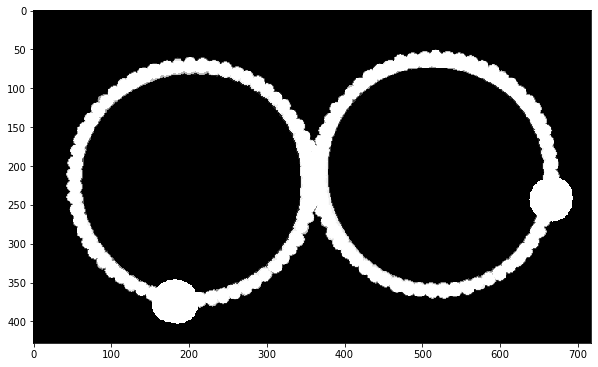

In [28]:
res = placeGap
circle = cv2.circle(np.zeros((160, 160), np.uint8), (80, 80), 25, 255, -1)
res = cv2.dilate(res, circle)
res = ringsWithGap | res
showImage(res)